In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix

# Load the dataset
data = pd.read_csv("tmdb_5000_movies.csv")

# Extract the relevant features for the model
X = data["overview"].fillna("")
y = data["vote_average"].apply(lambda x: 1 if x >= 6.5 else 0)

# Vectorize the data
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(X)

# Convert the sparse matrix to a compressed row format
X = csr_matrix(X)

# Split the data into training and testing sets
split = int(0.8 * X.shape[0])
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5920915712799167


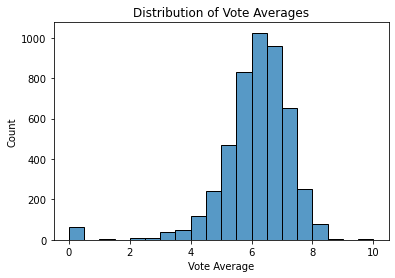

In [6]:
import seaborn as sns

# Visualize the distribution of the target variable
sns.histplot(data=data, x="vote_average", binwidth=0.5)
plt.xlabel("Vote Average")
plt.ylabel("Count")
plt.title("Distribution of Vote Averages")
plt.show()